# Case study on Unsupervised Learning
Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No missing Values in the dataset.

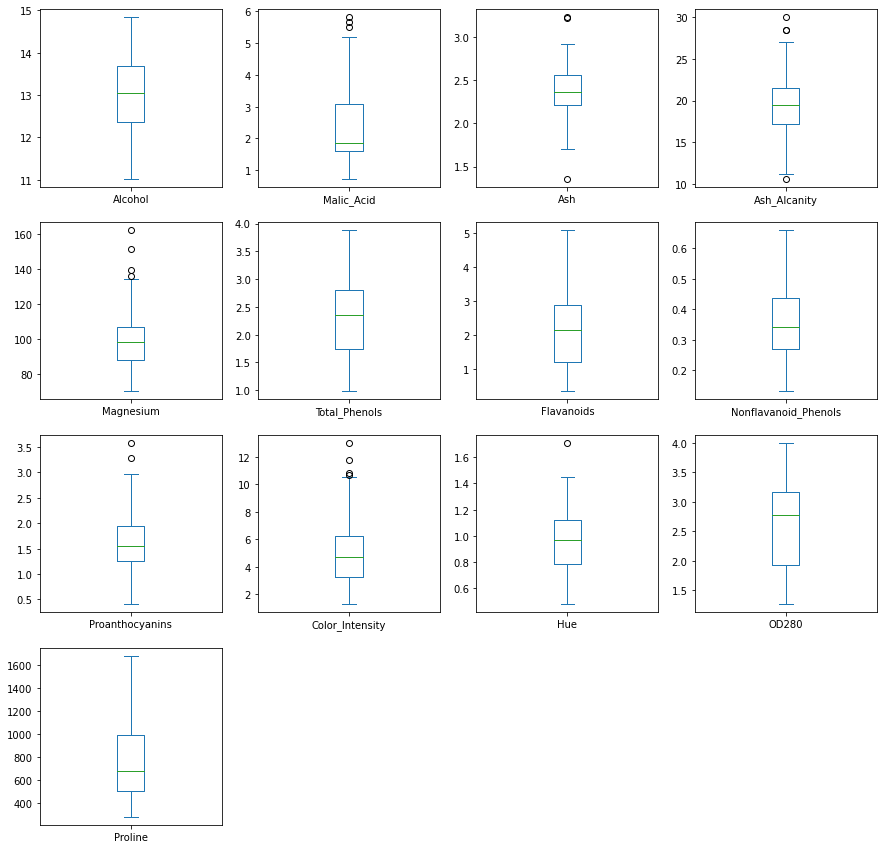

In [6]:

df.plot(kind ='box',subplots =True,layout =(4,4),figsize = (15,15))
plt.show()

In [7]:
#Capping  Outliers.
def remove_outlier(col):
    Q1,Q3=col.quantile(.25),col.quantile(.75)
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
for column in df.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])# capping to ur if value >ur, else original value
    df[column]=np.where(df[column]<lr,lr,df[column])
    

In [8]:
df.shape

(178, 13)

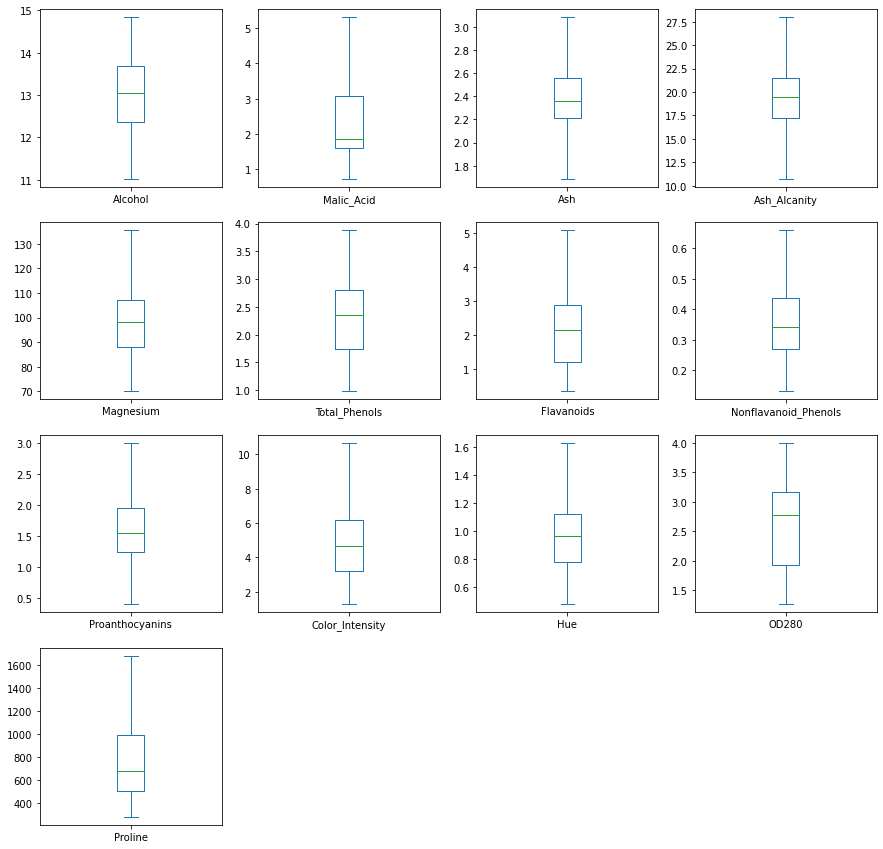

In [9]:
df.plot(kind ='box',subplots =True,layout =(4,4),figsize = (15,15))
plt.show()

In [10]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [11]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.330435,2.366721,19.478090,99.483146,2.295112,2.029270,0.361854,1.586067,5.038146,0.956979,2.611685,746.893258
std,0.811827,1.100173,0.263705,3.287757,13.414186,0.625851,0.998859,0.124453,0.558153,2.260881,0.227095,0.709990,314.907474
min,11.030000,0.740000,1.688750,10.750000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.302500,3.078750,27.950000,135.500000,3.880000,5.080000,0.660000,3.000000,10.670000,1.626250,4.000000,1680.000000


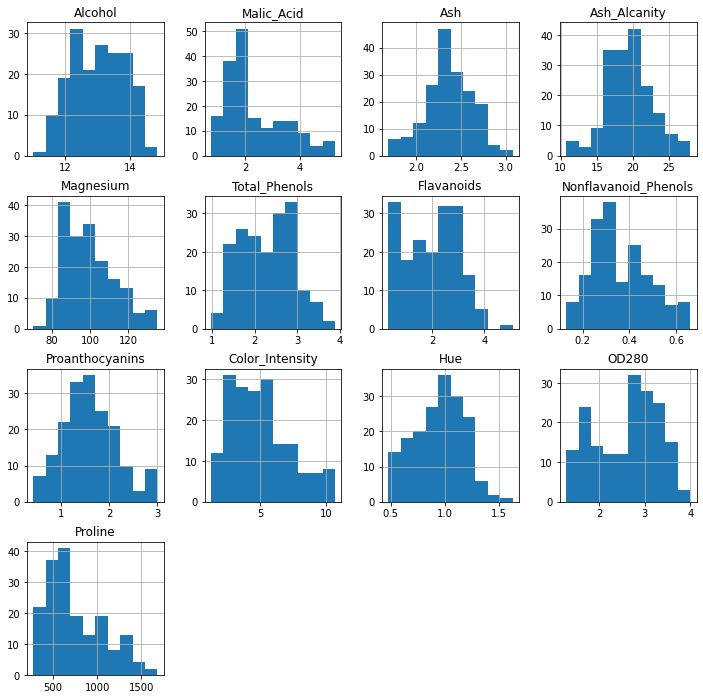

In [12]:
df.hist(figsize = (12,12), layout= (4,4))
plt.show()

In [13]:
#Min MAx Scaling.
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()


In [14]:
for f in df.columns:
    df[f] = mc.fit_transform(df[[f]])

In [15]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.348589,0.487749,0.507447,0.450124,0.453487,0.356386,0.437460,0.454080,0.400229,0.416121,0.491460,0.334446
std,0.213639,0.241134,0.189716,0.191149,0.204797,0.215811,0.210730,0.234818,0.215503,0.240775,0.198120,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.189041,0.375000,0.375000,0.274809,0.262931,0.182489,0.264151,0.324324,0.206603,0.263904,0.244505,0.158702
50%,0.531579,0.246575,0.482914,0.508721,0.427481,0.474138,0.378692,0.396226,0.442085,0.363152,0.423119,0.553114,0.282097
75%,0.696711,0.513425,0.625000,0.625000,0.564885,0.627586,0.534810,0.580189,0.594595,0.523962,0.558342,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

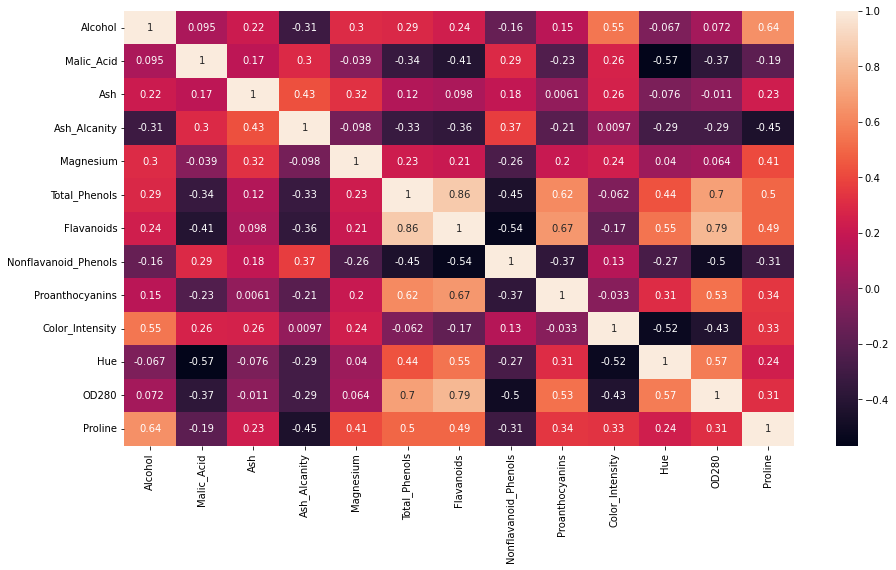

In [16]:
#Colinearity check
plt.figure(figsize =(15,8))
sns.heatmap(df.corr(), annot =True)

In [17]:
# remove corelated features >.7
remove = ['Flavanoids']
df.drop(remove, axis =1,inplace =True)

## K Means Clustering.

n: 2, wcss: 74.51474129362266 , Silhouette Score:  0.2647042521241137
None
n: 3, wcss: 74.51474129362266 , Silhouette Score:  0.2854718604518853
None
n: 4, wcss: 56.825648157370814 , Silhouette Score:  0.23335233883305015
None
n: 5, wcss: 52.62919150636387 , Silhouette Score:  0.2151963396515368
None
n: 6, wcss: 49.85406473296803 , Silhouette Score:  0.16834245340736467
None
n: 7, wcss: 46.90876035001454 , Silhouette Score:  0.18912191640414275
None


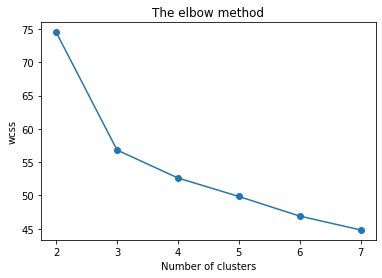

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
n =np.arange(2,8)
for i in n:
    model = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    model.fit(df)
    y = model.fit_predict(df)
    wcss.append(model.inertia_)
    print( print('n: {}, wcss: {} , Silhouette Score:  {}'.format(i, wcss[i-3],silhouette_score(df, y))))
plt.plot(range(2,8),wcss,'-o')
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()   

In [19]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [20]:
# select number of clusters as 3
model = KMeans(n_clusters = 3, init ='k-means++', random_state = 42)
y =model.fit_predict(df)
df['category'] = y


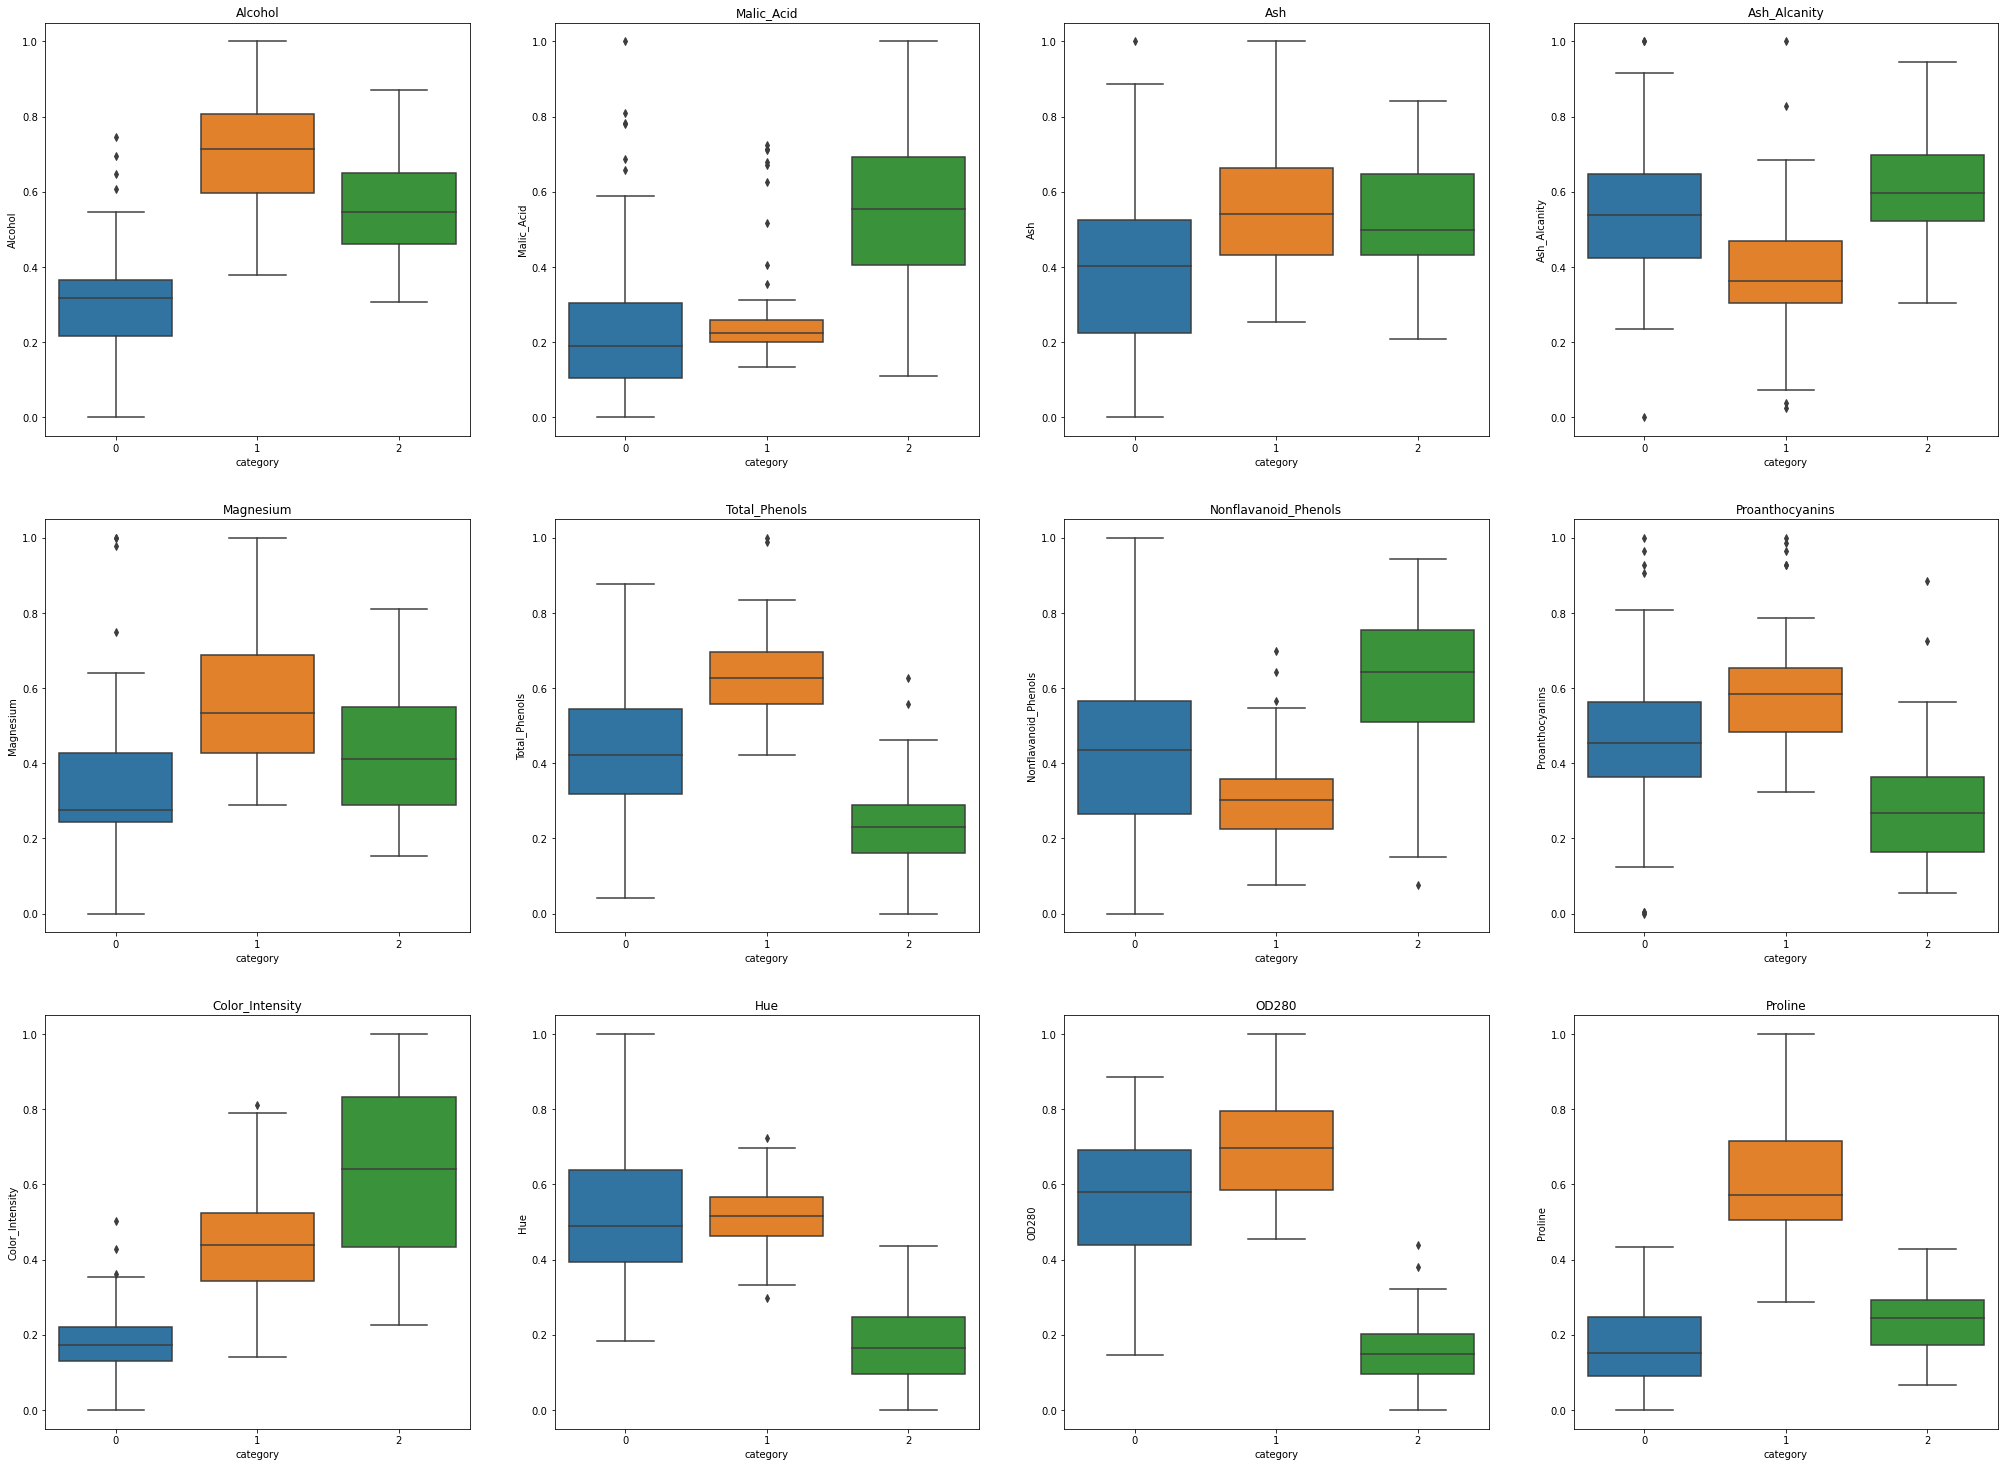

In [21]:
f=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Nonflavanoid_Phenols',
          'Proanthocyanins','Color_Intensity', 'Hue', 'OD280', 'Proline']
plt.figure(figsize=(35,35))
for i in range(len(f)):
    plt.subplot(4,4,i+1)
    sns.boxplot(data = df, x ='category',y =f[i])
    plt.title(f[i])


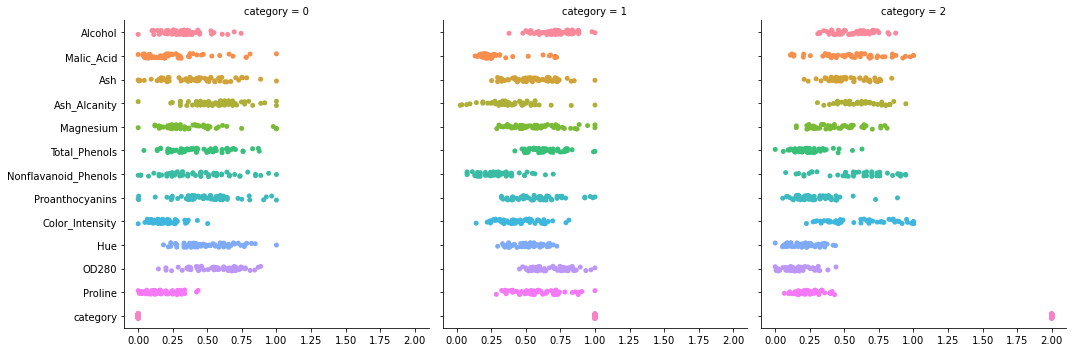

In [22]:
sns.catplot(data=df, orient ='h',col ='category')

In [23]:
df.groupby('category').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
category,,,,,,,,,,,,
0,0.318541,0.252528,0.403096,0.548053,0.349526,0.442006,0.432819,0.466830,0.185191,0.505499,0.566600,0.165110
1,0.705651,0.275518,0.548709,0.377812,0.569391,0.642114,0.300340,0.582379,0.443513,0.512720,0.690386,0.593894
2,0.553715,0.560301,0.524386,0.609952,0.437659,0.242732,0.607473,0.284124,0.626741,0.184917,0.156288,0.243266


## Hierarchical Clustering

In [24]:
X = df.drop('category', axis =1)

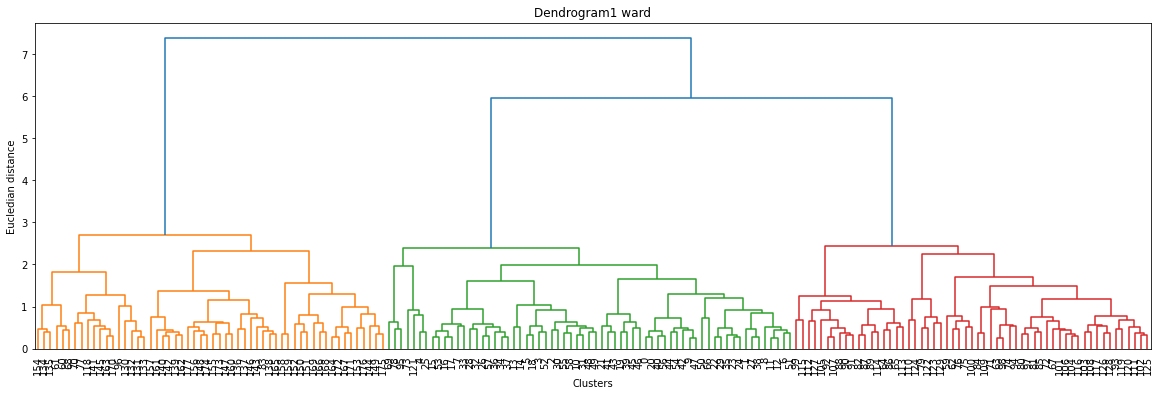

In [25]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (20,6))
dendrogram1 = sch.dendrogram(sch.linkage(X,method ='ward'))
plt.title('Dendrogram1 ward')
plt.xlabel('Clusters')
plt.xticks(fontsize =10)
plt.ylabel('Eucledian distance')
plt.show()


In [26]:
from sklearn.cluster import AgglomerativeClustering
nc= np.arange(3,12)
for n in nc:
    hc1 = AgglomerativeClustering(n_clusters = n, affinity ='euclidean', linkage ='ward')
    y_hc1 = hc1.fit_predict(X)
    print('Silhouette Score(n={}): {}'.format(n,silhouette_score(X, y_hc1)))

Silhouette Score(n=3): 0.27476320620225386
Silhouette Score(n=4): 0.2216423009498434
Silhouette Score(n=5): 0.1919535769571621
Silhouette Score(n=6): 0.19367320231092866
Silhouette Score(n=7): 0.18945329269436426
Silhouette Score(n=8): 0.19405432679802975
Silhouette Score(n=9): 0.13309125143811912
Silhouette Score(n=10): 0.14406084151468118
Silhouette Score(n=11): 0.15172917782650938


As per HC , number of optimal clusters are 9.But 9 categories will be hard to visualize.We can get the grouped mean values.

In [27]:
hc1 = AgglomerativeClustering(n_clusters = 9, affinity ='euclidean', linkage ='ward')
df['category'] = hc1.fit_predict(X)
df.groupby('category').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
category,,,,,,,,,,,,
0,0.400000,0.215421,0.586459,0.641611,0.900763,0.556650,0.388140,0.714837,0.260764,0.567067,0.650968,0.353984
1,0.425439,0.340091,0.424560,0.485142,0.496183,0.216667,0.523061,0.203990,0.363744,0.279462,0.178673,0.251347
2,0.702971,0.306708,0.448567,0.318923,0.500369,0.608120,0.236762,0.562461,0.410423,0.473071,0.757415,0.514334
3,0.343700,0.195002,0.318509,0.500705,0.306269,0.484431,0.307033,0.444600,0.186853,0.493308,0.617827,0.149224
4,0.261404,0.218326,0.541667,0.640342,0.265479,0.349425,0.665618,0.446375,0.167613,0.590149,0.501832,0.156681
5,0.598607,0.494053,0.569668,0.643810,0.533453,0.259229,0.508324,0.387009,0.882353,0.128296,0.136178,0.260930
6,0.576441,0.721044,0.564106,0.652685,0.358415,0.261248,0.747529,0.252436,0.537806,0.217272,0.183325,0.233238
7,0.322807,0.785845,0.445743,0.668605,0.351145,0.569540,0.393082,0.673745,0.139688,0.327154,0.656288,0.126248
8,0.733041,0.232978,0.618539,0.388997,0.584676,0.684674,0.354997,0.595739,0.512208,0.548003,0.618641,0.694405


## PCA & K means clustering

In [28]:
X = df.drop('category', axis =1)
from sklearn.decomposition import PCA

In [29]:
pca = PCA(.9)
pca.fit(X)
# pca = PCA(n_components = 3)
# pca.fit(df1)
x_pca = pca.transform(X)
x_pca.shape

(178, 8)

In [30]:
pca = PCA(n_components = 6)
pca.fit(X)
x_pca = pca.transform(X)
pca.explained_variance_ratio_.sum()

0.8544708284640119

x_pca has 6 components with ~85% variance explained.We can proceed clustering with the dimensionality reduced data.

n: 2, wcss: 74.51474129362266 , Silhouette Score:  0.2647042521241137
None
n: 3, wcss: 74.51474129362266 , Silhouette Score:  0.2854718604518853
None
n: 4, wcss: 56.825648157370814 , Silhouette Score:  0.23335233883305015
None
n: 5, wcss: 52.62919150636387 , Silhouette Score:  0.2151963396515368
None
n: 6, wcss: 49.85406473296803 , Silhouette Score:  0.16834245340736467
None
n: 7, wcss: 46.90876035001454 , Silhouette Score:  0.18912191640414275
None


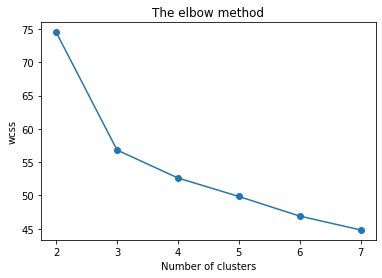

In [31]:
wcss = []
n =np.arange(2,8)
for i in n:
    model = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    model.fit(X)
    y = model.fit_predict(X)
    wcss.append(model.inertia_)
    print( print('n: {}, wcss: {} , Silhouette Score:  {}'.format(i, wcss[i-3],silhouette_score(X, y))))
plt.plot(range(2,8),wcss,'-o')
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()   

In [32]:
# choose n as 3
model = KMeans(n_clusters = 3, init ='k-means++', random_state = 42)
model.fit(X)
y = model.fit_predict(X)

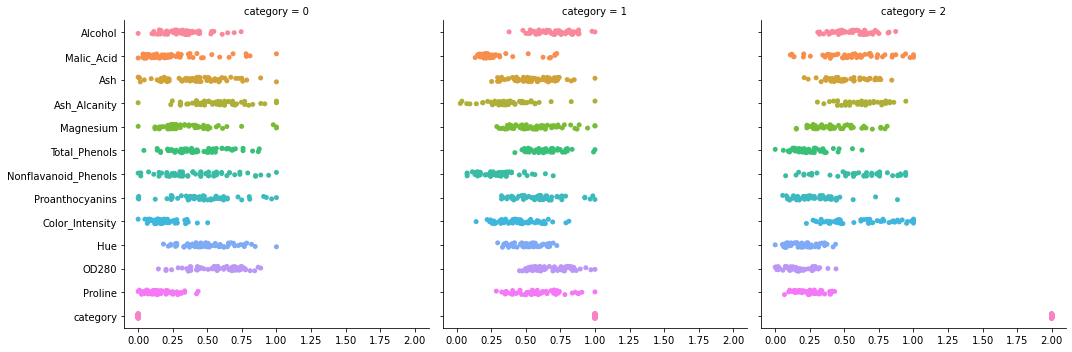

In [33]:
df['category'] = y
sns.catplot(data=df, orient ='h',col ='category')

Category 0 has low values, Category 2 has medium values and Category 1 has high values.

In [34]:
df.groupby('category').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
category,,,,,,,,,,,,
0,0.318541,0.252528,0.403096,0.548053,0.349526,0.442006,0.432819,0.466830,0.185191,0.505499,0.566600,0.165110
1,0.705651,0.275518,0.548709,0.377812,0.569391,0.642114,0.300340,0.582379,0.443513,0.512720,0.690386,0.593894
2,0.553715,0.560301,0.524386,0.609952,0.437659,0.242732,0.607473,0.284124,0.626741,0.184917,0.156288,0.243266


Since the data set is small with not much features, PCA doesnt have much effect in clustering.Similar result was obtained with Kmeans clustering without PCA.